To get around Colab's Markdown display issues and potential issues with the `plotly` library, the questions in this problem set are rendered in code blocks. Simply re-run the associated code block to re-render the question, if needed.

As a benefit, the questions will come with occasional hints about your programming environment.

Make sure the file `PS7.py` is in the same directory as this notebook. This file contains the question definitions and helper functions for this dataset. Do not modify this file.

If you do use Google Colab, make the notebook editable for the TAs, and provide the share link to the notebook below. Please share the notebook you worked on, and not a copy of it.

**Make sure the 'notify' checkbox is <i>not</i> checked when sharing the notebook.**

--------


link to Colab:

(leave blank if not using Colab)

In [1]:
# download necessary packages
%pip install sentence-transformers plotly datasets transformers "transformers[torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 517.1 kB/s eta 0:00:00:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 876.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 1.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 5.4 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 5.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.9/402.9 kB 5.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481

In [3]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import seaborn as sns
sns.set_style()

import torch.nn as nn
import torch.nn.functional as F

import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import PS7

PS7 helper functions loaded [6a7fa96a6737421c2fed37cdfb4b7031]. Running in Colab: False
A GPU is not available, or you are not using a GPU-providing runtime. You can run this notebook on Google Colab, which has a free GPU.


<IPython.core.display.Javascript object>

In [4]:
PS7.intro()

<IPython.core.display.Javascript object>

In [5]:
PS7.q0()

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 0 - your answers here</b></span>



In [6]:
PS7.part1()

<IPython.core.display.Javascript object>

In [7]:
PS7.q1()

<IPython.core.display.Javascript object>

In [8]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes')
)
# your code here
print(type(newsgroups))
print(newsgroups.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


<IPython.core.display.Javascript object>

In [9]:
print(newsgroups.data[0][:500])
print("\nTarget Label:", newsgroups.target[0])
print("Target name:", newsgroups.target_names[newsgroups.target[0]])
print("Num of categories:", len(newsgroups.target_names))



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a

Target Label: 10
Target name: rec.sport.hockey
Num of categories: 20


<IPython.core.display.Javascript object>

In [10]:
for i in range(3):
    print(f"\n Post{i}")
    print(newsgroups.data[i][:500])
    print("Target Label:", newsgroups.target[i])
    print("Target name:", newsgroups.target_names[newsgroups.target[i]])


 Post0


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a
Target Label: 10
Target name: rec.sport.hockey

 Post1
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

Target Label: 3
Target name: comp.sys.ibm.pc.hardware

 Post2




	Finally you said what you dream about. Medit

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 1 - your answers here</b></span>

a) The data come from fetch_20newsgroups. Each data point is a forum post

b) we're trying to predict the topic category of each post

c) No. because the data in newsgroups["data"] are plain text, ML model can't understand plain text directly 

In [11]:
PS7.q2()

<IPython.core.display.Javascript object>

In [12]:
from sklearn.datasets import fetch_20newsgroups_vectorized

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

subset_size = 2000


2025-05-04 16:58:44.251258: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<IPython.core.display.Javascript object>

In [13]:

# your code here
vectorized = fetch_20newsgroups_vectorized(subset='all')
X_tfidf_sparse =vectorized.data[:subset_size]
X_tfidf = X_tfidf_sparse.toarray()
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (2000, 130107)


<IPython.core.display.Javascript object>

In [16]:
model = SentenceTransformer('all-MiniLM-L6-v2')
newsgroups = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'))
texts=newsgroups.data[:subset_size]
doc_embeddings=[]
for i in range(subset_size):
    text = texts[i]
    embedding = model.encode(text)
    doc_embeddings.append(embedding)
X_embed=np.array(doc_embeddings)
print("embedding shapre: " ,X_embed.shape)


embedding shapre:  (2000, 384)


<IPython.core.display.Javascript object>

In [17]:
long_docs = 0
for text in texts:
    if len(text.split()) > 500:
        long_docs+=1 
print("num of truncated data points: ", long_docs)

num of truncated data points:  125


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 2 - your answers here</b></span>

a) 125

b) TF-IDF shape: (2000, 130107), embedding shape:  (2000, 384)

In [18]:
PS7.q3()

<IPython.core.display.Javascript object>

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# your code here
pca_tfidf= PCA(n_components = 100, random_state=42)
X_tfidf_pca = pca_tfidf.fit_transform(X_tfidf)
pca_bert = PCA(n_components=100, random_state=42)
X_bert_pca = pca_bert.fit_transform(X_embed)

<IPython.core.display.Javascript object>

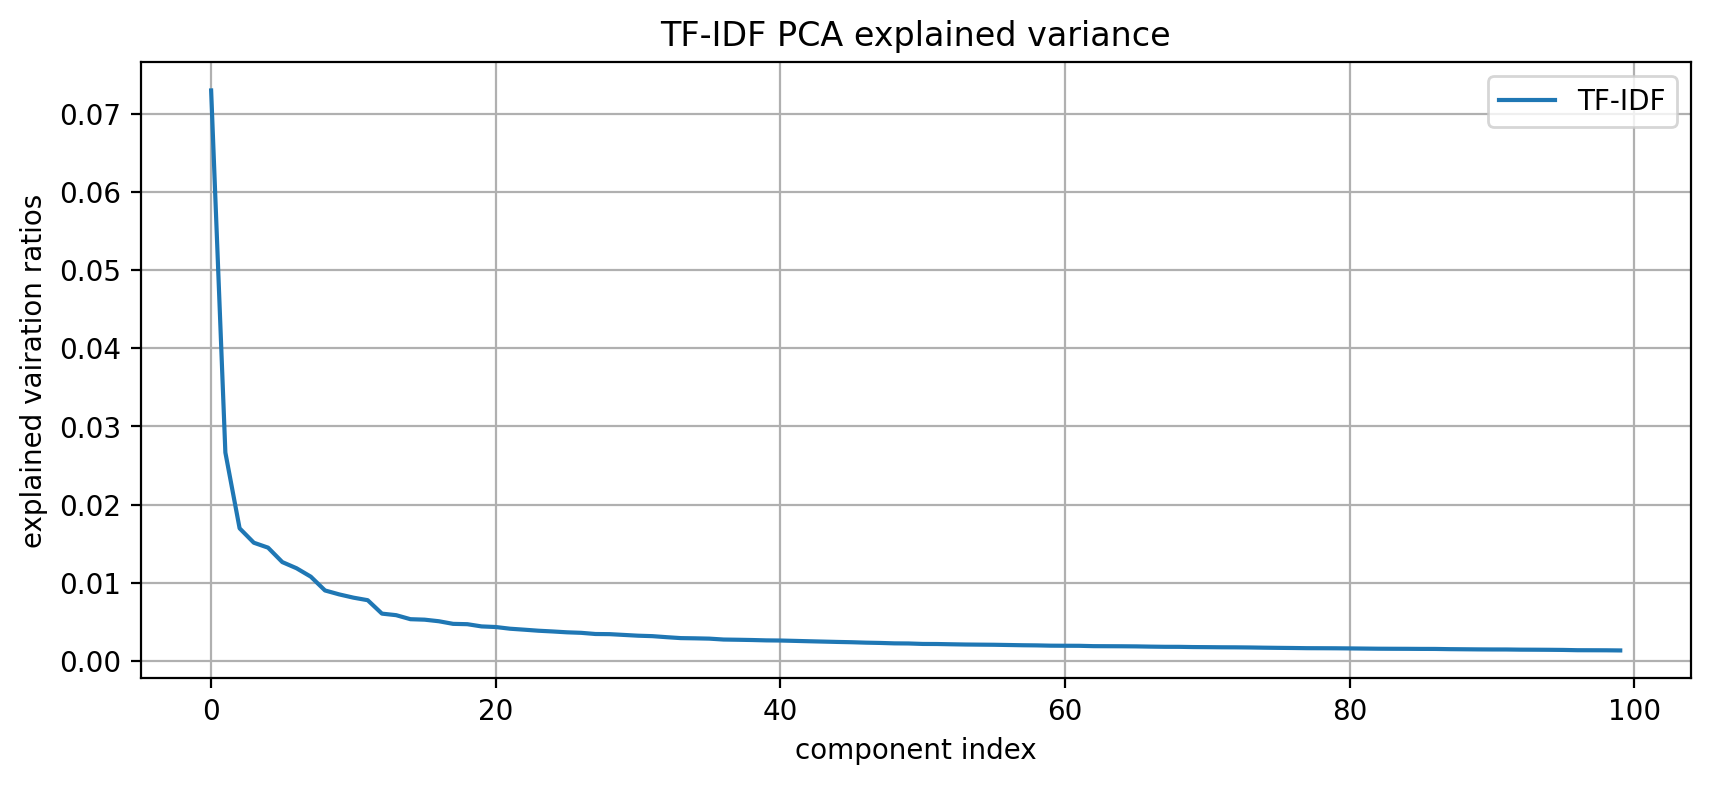

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(10,4))
plt.plot(pca_tfidf.explained_variance_ratio_, label='TF-IDF')
plt.xlabel("component index")
plt.ylabel("explained vairation ratios")
plt.title("TF-IDF PCA explained variance")
plt.grid(True)
plt.legend()
plt.show()

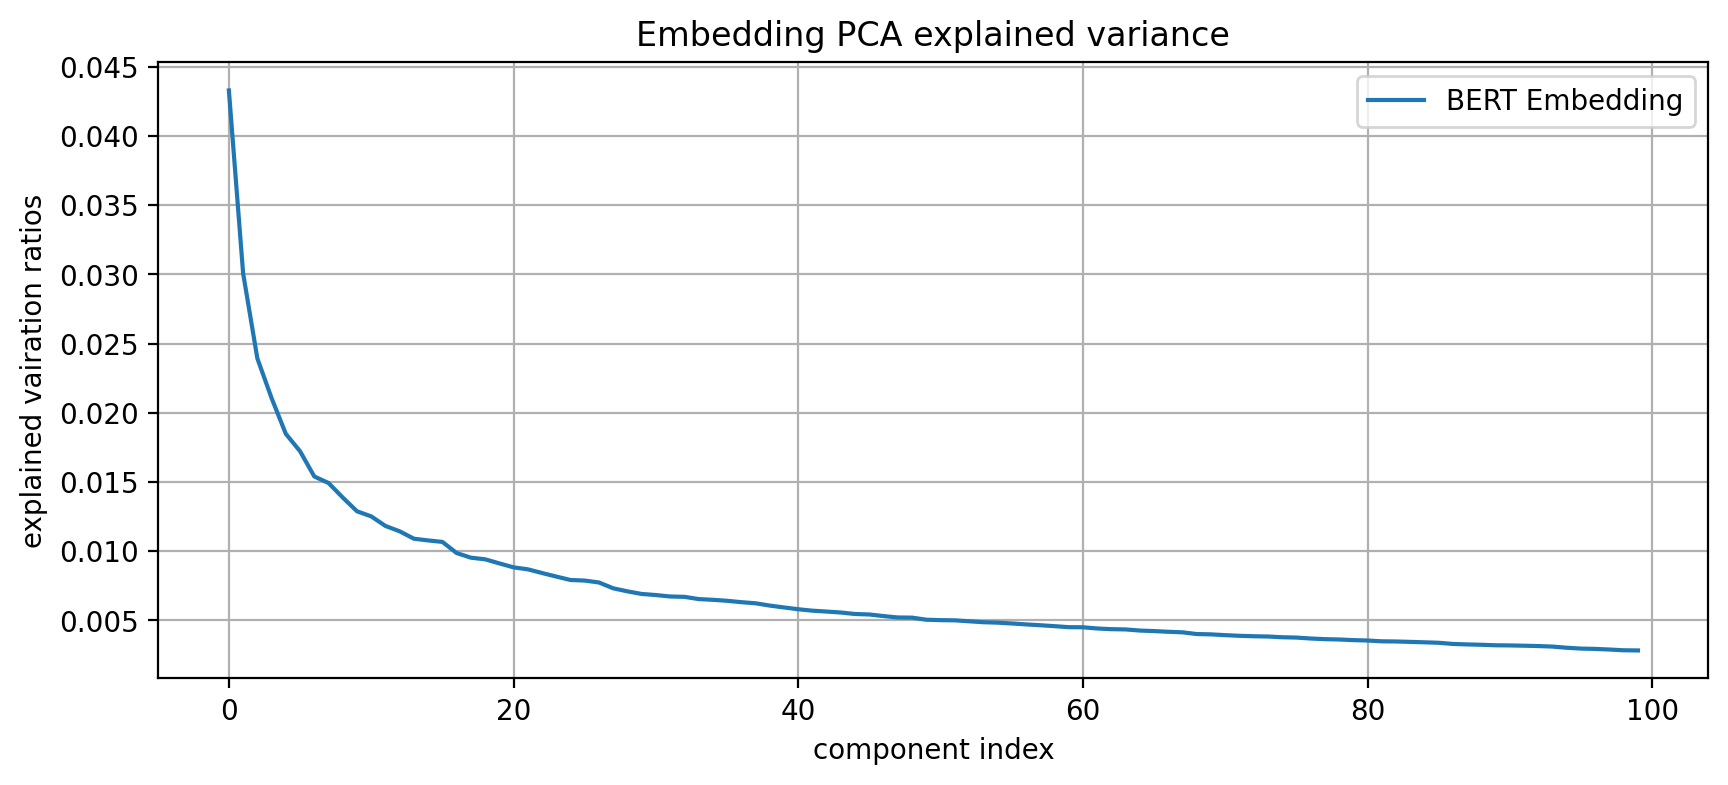

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(10,4))
plt.plot(pca_bert.explained_variance_ratio_, label='BERT Embedding')
plt.xlabel("component index")
plt.ylabel("explained vairation ratios")
plt.title("Embedding PCA explained variance")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
var_tfidf_top3 = sum(pca_tfidf.explained_variance_ratio_[:3])
print("tfidf loss of first 3 components:", 1-var_tfidf_top3)
var_bert_top3 = sum(pca_bert.explained_variance_ratio_[:3])
print("embedding loss of first 3 components:", 1-var_bert_top3)

tfidf loss of first 3 components: 0.8833905086240023
embedding loss of first 3 components: 0.902691513299942


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 3 - your answers here</b></span>

a) 
For TF-IDF: In the first few principal components, the explained vairance drops quickly. It means the first few components capture most of the information. 

For embedding: In the first few prinicipal components, the explained vairance drops slowly.It means more principal component are contribute to the information, so the information is more evenly distributed in each components.

b) 
tfidf loss of first 3 components: 0.8833905086240023
embedding loss of first 3 components: 0.902691513299942

In [23]:
PS7.q4()

<IPython.core.display.Javascript object>

In [24]:
import plotly.express as px

# your code here
pca_tfidf_3 = PCA(n_components=3, random_state=42)
X_tfidf_3d = pca_tfidf_3.fit_transform(X_tfidf)
pca_bert_3 = PCA(n_components=3, random_state=42)
X_bert_3d = pca_bert_3.fit_transform(X_embed)

<IPython.core.display.Javascript object>

In [25]:
print("TF-IDF (3D PCA):", sum(pca_tfidf_3.explained_variance_ratio_))
print("TF-IDf (first 3 of 100 pac):", sum(pca_tfidf.explained_variance_ratio_[:3]))

print("Embedding (3D PCA):", sum(pca_bert_3.explained_variance_ratio_))
print("Embedding (first 3 of 100 pac):", sum(pca_bert.explained_variance_ratio_[:3]))


TF-IDF (3D PCA): 0.11660949023762564
TF-IDf (first 3 of 100 pac): 0.1166094913759977
Embedding (3D PCA): 0.09730819799005985
Embedding (first 3 of 100 pac): 0.09730848670005798


<IPython.core.display.Javascript object>

In [59]:
!pip install nbformat --upgrade


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 6.0 MB/s eta 0:00:00:00:01


<IPython.core.display.Javascript object>

In [62]:
!pip install --upgrade nbformat ipython jupyter


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO: pip is looking at multiple versions of notebook to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

In [26]:
import plotly.express as px
target_names = newsgroups.target_names
labels = [target_names[i] for i in newsgroups.target[:subset_size]]
fig1 = px.scatter_3d(
    x=X_tfidf_3d[:,0],
    y=X_tfidf_3d[:,1],
    z=X_tfidf_3d[:,2],
    color=labels,
    title="TF-IDF PCA 3d",
    labels={'color': 'Category'}
)
fig1.show()

fig2=px.scatter_3d(
    x=X_bert_3d[:,0],
    y=X_bert_3d[:,1],
    z=X_bert_3d[:,2],
    color=labels,
    title="embedding PCA 3d",
    labels={'color': 'Category'}
)
fig2.show()

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 4 - your answers here</b></span>

a) yes, almost the same. 

TF-IDF (3D PCA): 0.11660949023762564
TF-IDf (first 3 of 100 pac): 0.1166094913759977
Embedding (3D PCA): 0.09730819799005985
Embedding (first 3 of 100 pac): 0.09730848670005798


b) no, because the vectors are not the same. when call PCA(n_components=3), it optimizes the best 3 axes. But when calling PCA(n_components=100), the top 3 may be differnt 


c) For TF-IDF: the data points from differetn categories are more separated, which means there's some overlap between groups

for embeding: the data points are closer, which means semantic embeddings is better in low dimensions

In [27]:
PS7.part2()

<IPython.core.display.Javascript object>

In [28]:
PS7.q5()

<IPython.core.display.Javascript object>

In [29]:
from sklearn.metrics import pairwise_distances_argmin

def k_means_clustering(X, k, random_state=None, max_iters=100):
    
    # your code here
    if random_state is not None: 
        np.random.seed(random_state)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]
    for iteration in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centriods = np.array([
            X[labels == i].mean(axis=0) if len(X[labels==i])>0 else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centriods):
            break
        centroids=new_centriods
    return centroids,labels,iteration+1


<IPython.core.display.Javascript object>

In [30]:
centroids,labels,iters = k_means_clustering(X_bert_3d,k=20,random_state=42)
print("Converged in", iters, "iterations")
print("centroids shape:", centroids.shape)
print("labels shape:", labels.shape)

Converged in 25 iterations
centroids shape: (20, 3)
labels shape: (2000,)


<IPython.core.display.Javascript object>

In [31]:
PS7.q6()

<IPython.core.display.Javascript object>

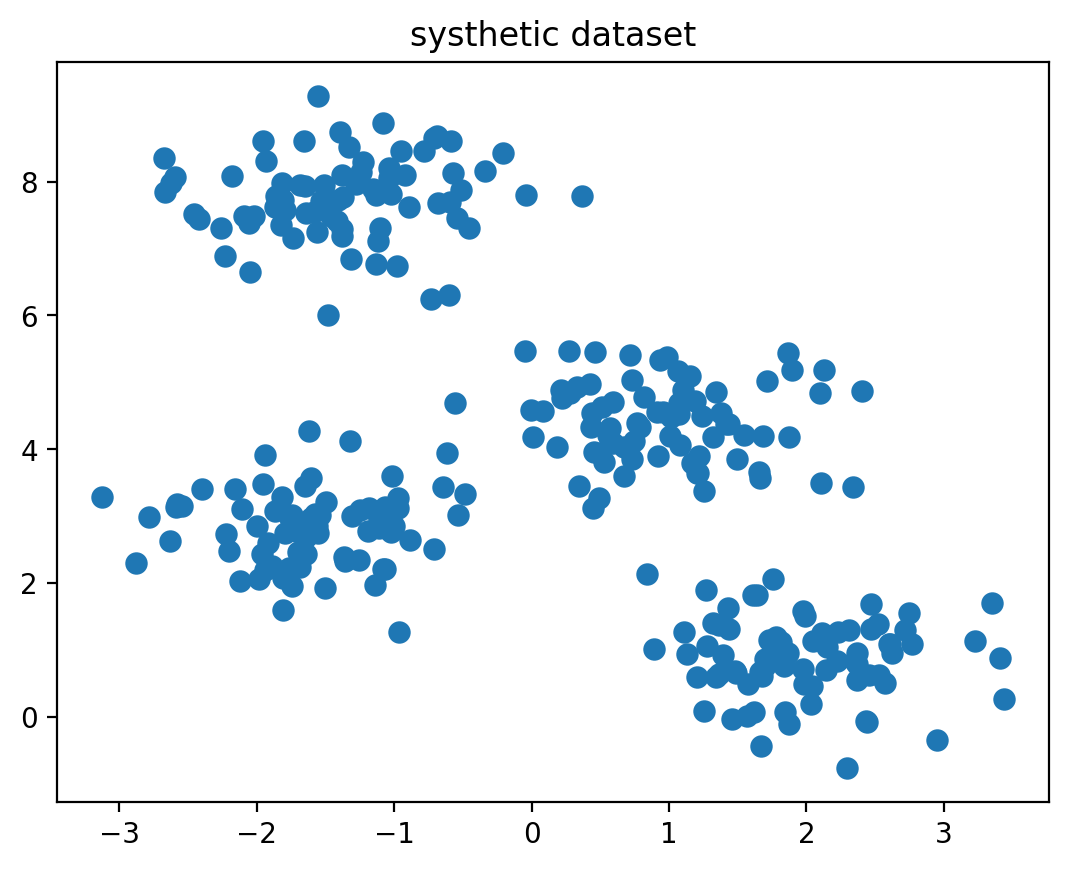

<IPython.core.display.Javascript object>

In [32]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# visualize the synthetic dataset to choose the number of clusters
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("systhetic dataset")
plt.show()

In [33]:
centroids,labels,iters=k_means_clustering(X, k=4,random_state=0)
print("converge interations:",iters)

converge interations: 7


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/zyb/opt/anaconda3/envs/fyp/lib/python3.8/site-packages/threadpoolctl.py:1223: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md




<IPython.core.display.Javascript object>

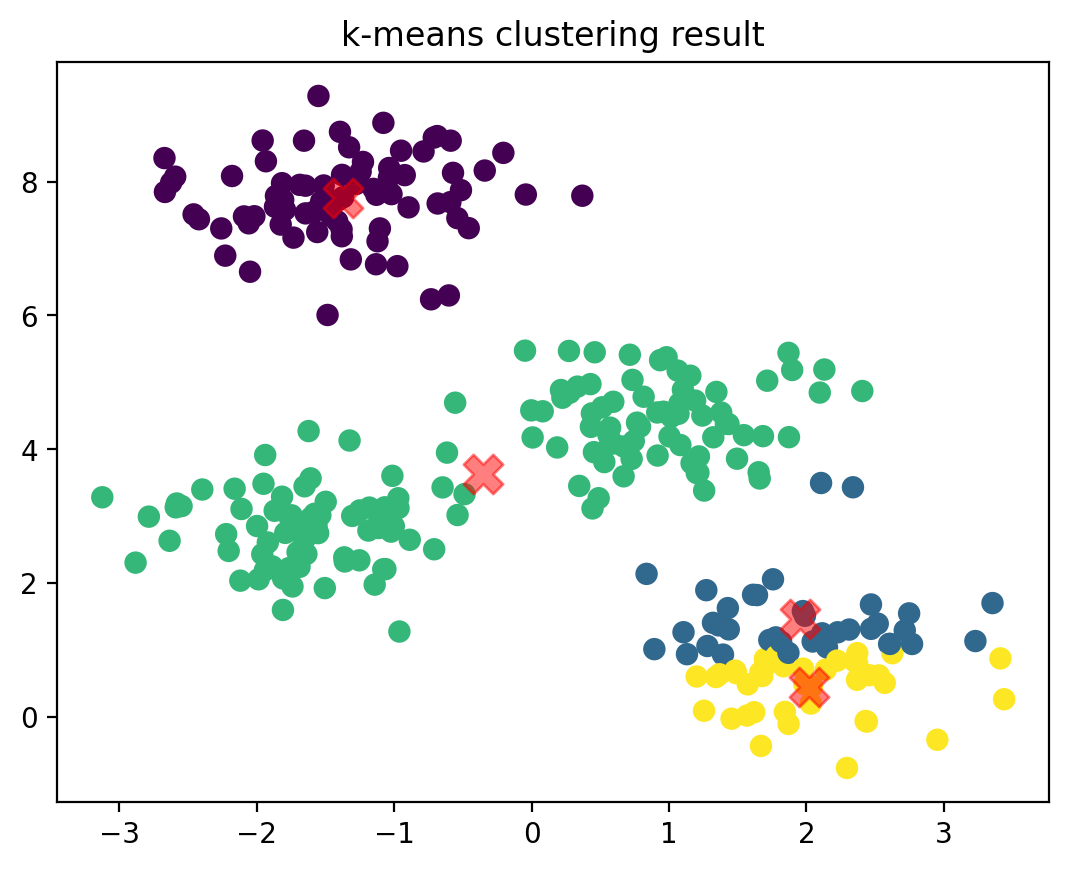

<IPython.core.display.Javascript object>

In [34]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200,alpha=0.5,marker='X')
plt.title("k-means clustering result")
plt.show()

In [35]:
PS7.q7()

<IPython.core.display.Javascript object>

In [38]:
# your code here
def compute_DBindex(X, labels, centroids):
    k=len(centroids)
    scatter=np.zeros(k)
    for i in range(k):
        points=X[labels==i]
        if len(points)>0:
            scatter[i]=np.mean(np.linalg.norm(points-centroids[i],axis=1))
    dbindex=0
    for i in range(k):
        max_ratio=0
        for j in range(k):
            if i!=j:
                dist=np.linalg.norm(centroids[i]-centroids[j])
                if dist != 0: 
                    ratio = (scatter[i]+scatter[j])/ dist
                    if ratio > max_ratio:
                        max_ratio = ratio
        dbindex += max_ratio
    return dbindex /k


<IPython.core.display.Javascript object>

In [39]:
k_values = list(range(2,16))
dbscores = []
for k in k_values:
    centroids, labels, iters=k_means_clustering(X_bert_3d,k=k,random_state=42)
    dbindex=compute_DBindex(X_bert_3d,labels,centroids)
    dbscores.append(dbindex)
    print(f"k={k}, DB index = {dbindex: .4f}")
    

k=2, DB index =  1.1727
k=3, DB index =  1.1036
k=4, DB index =  0.6151
k=5, DB index =  0.7570
k=6, DB index =  0.8984
k=7, DB index =  1.3072
k=8, DB index =  1.0388
k=9, DB index =  1.0395
k=10, DB index =  1.0632
k=11, DB index =  1.0286
k=12, DB index =  1.0662
k=13, DB index =  1.1739
k=14, DB index =  1.1576
k=15, DB index =  1.0899


<IPython.core.display.Javascript object>

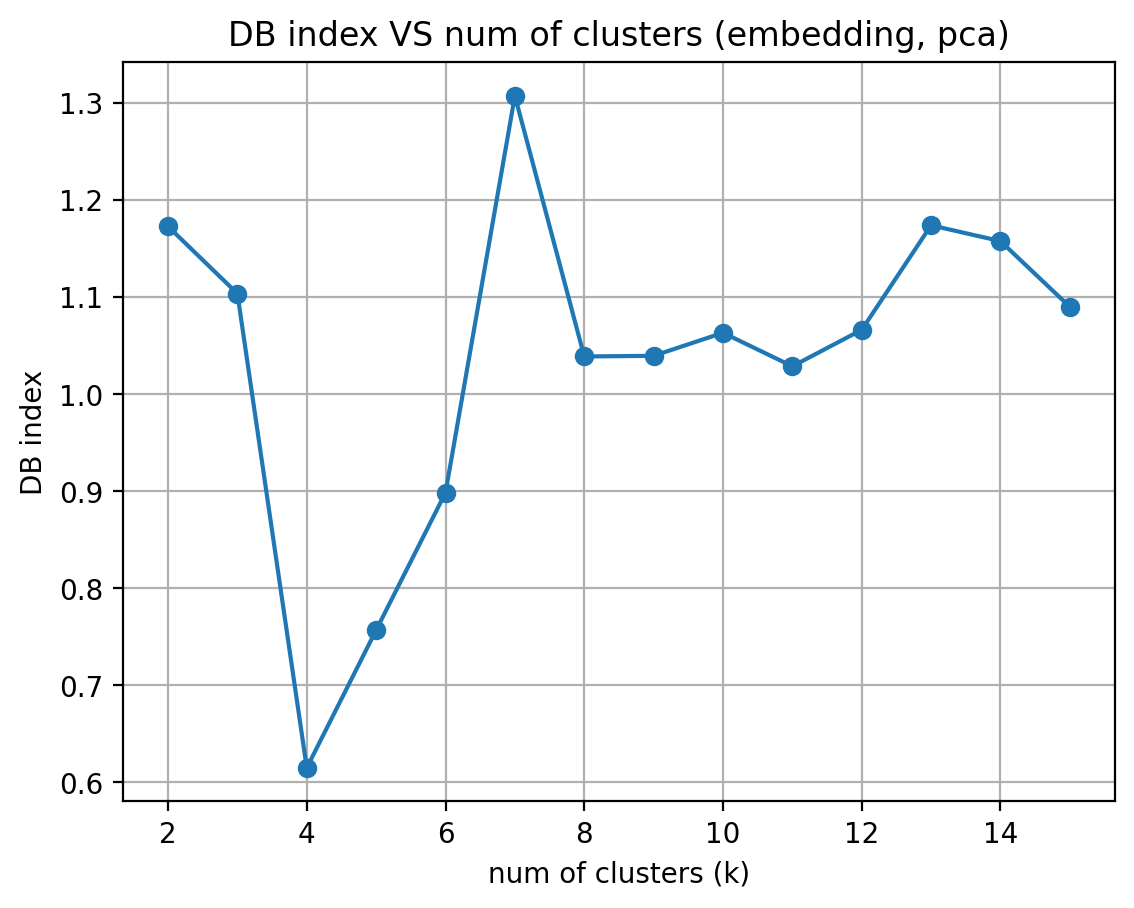

<IPython.core.display.Javascript object>

In [40]:
plt.plot(k_values, dbscores, marker='o')
plt.xlabel("num of clusters (k)")
plt.ylabel("DB index")
plt.title("DB index VS num of clusters")
plt.grid(True)
plt.show()

<span style="color:#FDB515"><b>Question 7 - your answers here</b></span>



c) 
when k=4, DB index is the lowest. A lower DB index means better clustering, so 4 is the optimal num 

4 is much smaller than the num of newsgroups (20). So it shows that when in 3d embedding, the data are grouped into a smaller num of categories. 

In 4c, many topics are overlapped. The DB index shows that a smaller num of clusters is more optimal because the data is clustered in larger groups

In [41]:
PS7.part3()

<IPython.core.display.Javascript object>

In [14]:
PS7.q8()

<IPython.core.display.Javascript object>

In [46]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from PS7 import newsgroups_tokenized_datasets

# tokenize the training and validation datasets and handle padding tokens (done for you)
base_model = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(base_model)
trn_dataset, val_dataset = newsgroups_tokenized_datasets(tokenizer)

tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForSequenceClassification.from_pretrained(
    base_model,
    num_labels=20,
    pad_token_id=tokenizer.pad_token_id
)
training_args=TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size = 8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none"
)

def compute_metrics(eval_pred):
    logits,labels=eval_pred
    preds=np.argmax(logits,axis=1)
    accuracy=np.mean(preds==labels)
    return {"accuracy": accuracy}

trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=trn_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()
results = trainer.evaluate()
print("validation accuracy:", results["eval_accuracy"])

Map (num_proc=4):   0%|          | 0/11314 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/7532 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/vb/9gx9dz810sv1yznq5g4ym6mm0000gn/T/ipykernel_71827/236251786.py:34: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



  0%|          | 0/4245 [00:00<?, ?it/s]

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
# instantiate the modoel

# hint: pass in pad_token_id=tokenizer.pad_token_id
model = ...# your code here

# hyperparameters
args = TrainingArguments(
    report_to="none" # keep this to disable external logging
    # your code here
)

trainer = Trainer(
    # your code here 
)
trainer.train()

# evaluation code here

<span style="color:#FDB515"><b>Question 8 - your answers here</b></span>

hyperparameters:

train accuracy:

test accuracy:

In [15]:
PS7.q9()

<IPython.core.display.Javascript object>

In [ ]:
# your code here


<span style="color:#FDB515"><b>Question 9 - your answers here</b></span>

tf-idf hyperparameters:

tf-idf train accuracy:

tf-idf test accuracy:

miniLM hyperparameters:

miniLM train accuracy:

miniLM test accuracy:

discussion:

In [16]:
PS7.ec1()

<IPython.core.display.Javascript object>

In [ ]:
# your code here

<span style="color:#FDB515"><b>Extra credit 1 - your answers here</b></span>

a) 

b)


In [17]:
PS7.ec2()

<IPython.core.display.Javascript object>

In [ ]:

class SelfAttention(nn.Module):
    def __init__(self, d_embedding):
        """
        d_embedding: int, the dimension of the input embedding
        """
        super().__init__()
        # your code here
        ...


    def forward(self, x):
        # your code here
        ...

def attention_classifier(num_classes):
    # create an embedding layer and freeze it so that it won't be updated
    embed = nn.Embedding.from_pretrained(..., freeze=True)
    d_embedding = embed.embedding_dim

    # your implemented attention layer
    attn = SelfAttention(d_embedding=d_embedding)

    # classifier head
    return nn.Sequential(
        embed,                      # tokens -> word vectors
        attn,                       # self‑attention
        nn.AdaptiveAvgPool1d(1),    # mean-pool over the sequence of words
        nn.Flatten(),
        nn.Linear(d_embedding, num_classes)  # classifier
    )


In [18]:
PS7.ec3()

<IPython.core.display.Javascript object>

In [ ]:
# your code here

<span style="color:#FDB515"><b>Extra credit 3 - your answers here</b></span>

